In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def read_bin(filename,N):
	with open(filename, 'rb') as f:
		data = np.fromfile(f, dtype=np.int32)

	data = data.reshape((N, N))
	return data

def segment_time(t_0,t_max):
	bins= np.arange(0,t_max+1,t_0)
	segments = []
	for i in range(len(bins)):
		segments.append(bins[i:i+2])
	return segments[:-1]


def make_animation2(data,time_region,skip=1,folder='segmentos/'):

	fig, ax = plt.subplots()
	cax = ax.imshow(data[0], interpolation='nearest')
	cax.set_clim(0,4)
	fig.colorbar(cax)
	fig.set_dpi(200)
	start=time_region[0]
	end=time_region[1]

	plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

	def init():
		cax.set_data(data[0])
		ax.set_xticks([])
		ax.set_yticks([])
		return [cax]

	def update(i):
		cax.set_data(data[i])
		cax.set_cmap('inferno')
		cax.set_clim(0,4)
		ax.set_xticks([])
		ax.set_yticks([])
		return [cax]

	ani = animation.FuncAnimation(fig, update, frames=range(0, len(data), skip), init_func=init, blit=True,interval=3)
	ani.save(folder+'animation_secuencial'+str(start)+"_"+str(end)+'.gif', fps=30)
	plt.close(fig)

	


In [126]:
config=np.genfromtxt('datos2/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])
print(N,t_max)

180 100000


In [127]:
#load csv files
data_folder='datos2'
config=np.genfromtxt(data_folder+'/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])

data=[]

for i in range(t_max):
	data.append(
		read_bin('datos2/datos'+str(i)+'.bin',N)
		)
	




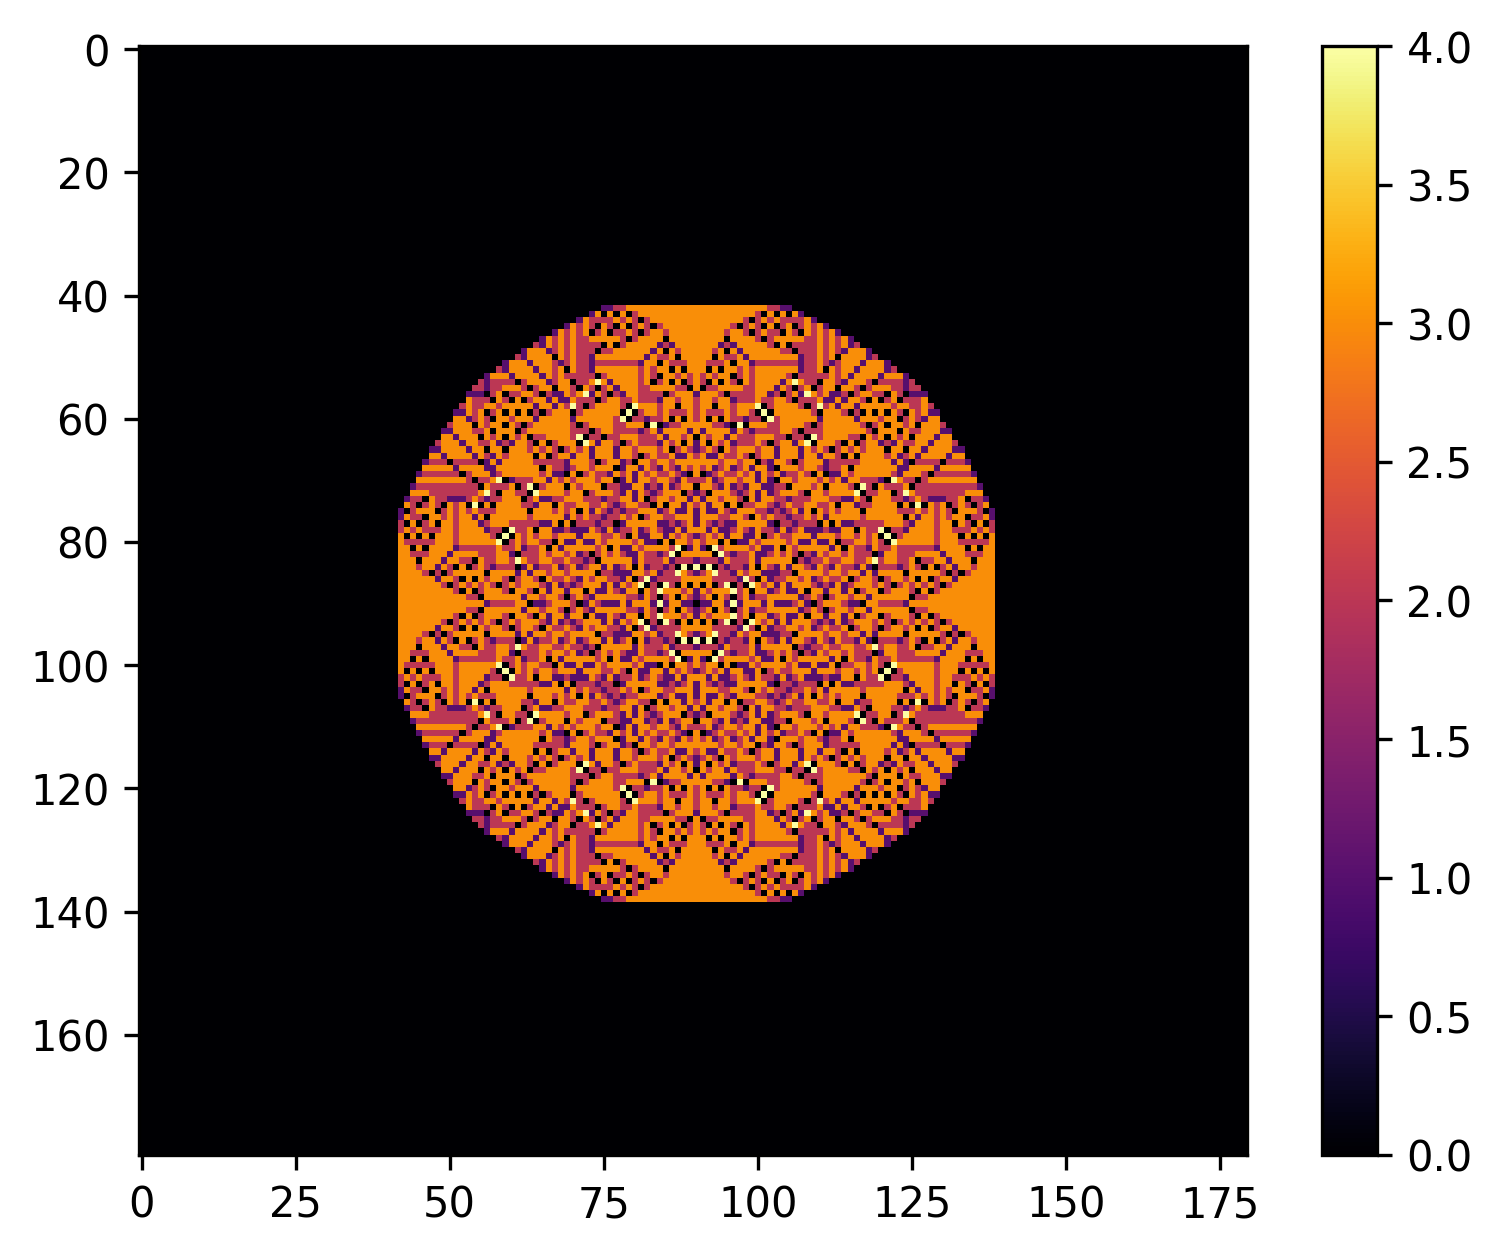

In [128]:

	

plt.figure(dpi=300)
plt.imshow(data[t_max-1],interpolation='nearest',cmap='inferno')
plt.clim(0,4)
plt.colorbar()


In [123]:
segments = segment_time(500,t_max)
data_segmented = []
for i in range(len(segments)):
	data_segmented.append(
		data[segments[i][0]:segments[i][1]]
		)





	


In [ ]:
for i in range(len(data_segmented)):
	data_segment= data_segmented[i]
	time_region = segments[i]

	# print(time_region)

	make_animation2(data_segment,time_region,10,'segmentos3/')

In [131]:
last= len(data_segmented)-1
make_animation2(data_segmented[-1],segments[-1],1,'')

In [132]:
segments[-1]

array([49900, 50000])